In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import mlcrate as mlc
import skimage
from skimage import io

In [3]:
import matplotlib.pyplot as plt

In [17]:
df_train = pd.read_csv('kaggle_train.csv')

print(df_train['image_id'].tolist())

selector = (df_train['image_id'] == '200021637-00016_1')

booklst = ["100241706_00005_2", "brsk001-005", 'brsk002-003', 'brsk003-024']

for book in booklst:
    selector = selector | (df_train['image_id'] == book)

df_train = df_train[selector]

['100241706_00004_2', '100241706_00005_1', '100241706_00005_2', '100241706_00006_1', '100241706_00007_2', '100241706_00008_1', '100241706_00008_2', '100241706_00009_1', '100241706_00009_2', '100241706_00010_1', '100241706_00010_2', '100241706_00011_1', '100241706_00011_2', '100241706_00012_1', '100241706_00012_2', '100241706_00013_1', '100241706_00013_2', '100241706_00014_1', '100241706_00014_2', '100241706_00015_1', '100241706_00015_2', '100241706_00016_1', '100241706_00016_2', '100241706_00017_1', '100241706_00017_2', '100241706_00018_1', '100241706_00018_2', '100241706_00019_1', '100241706_00019_2', '100241706_00020_1', '100241706_00020_2', '100241706_00021_1', '100241706_00021_2', '100241706_00022_1', '100241706_00022_2', '100241706_00023_1', '100241706_00023_2', '100241706_00024_1', '100241706_00024_2', '100241706_00025_1', '100241706_00025_2', '100241706_00026_1', '100241706_00026_2', '100241706_00027_1', '100241706_00027_2', '100241706_00028_1', '100241706_00028_2', '100241706_0

In [5]:
df_train.values

array([['100241706_00005_2',
        'U+306F 572 1376 125 57 U+306E 1551 2080 69 68 U+3078 891 1731 163 68 U+304C 309 1824 84 87 U+306B 292 1468 53 89 U+3081 901 1854 100 91 U+304B 1821 3067 168 96 U+3068 1888 2618 23 99 U+308A 324 2127 35 100 U+3084 865 2354 172 105 U+4E0A 257 1974 159 112 U+306B 877 2850 168 113 U+305F 905 2162 91 116 U+3088 609 3271 61 121 U+3044 1853 2747 105 132 U+3042 1189 2120 152 133 U+51E0 583 2062 148 135 U+3066 1209 2272 121 137 U+8A1B 1175 3006 192 139 U+59CB 1827 3365 163 140 U+3063 868 1996 168 140 U+4F55 555 2466 155 141 U+3080 1829 1179 160 141 U+5730 251 2867 200 141 U+3075 1845 2880 127 144 U+3089 1895 3165 81 145 U+5341 567 2674 124 145 U+6545 1503 2188 156 148 U+3084 1187 2656 161 148 U+308A 940 1359 37 155 U+4ED8 1535 2654 92 155 U+753A 1817 1860 159 155 U+306E 1841 2068 93 156 U+662F 607 3085 131 156 U+4F4F 1799 956 164 156 U+3084 1177 1675 180 156 U+3066 572 2258 99 157 U+3075 1817 2479 139 159 U+305F 884 1198 125 160 U+3089 940 2682 79 167 U+724

In [ ]:
for img, labels in df_train.values:
    if type(labels) == float:
        continue
    chars = []
    for unic, x, y, w, h in np.array(labels.split()).reshape(-1, 5):
        chars.append((unic, int(int(x)+int(w)/2), int(int(y)+int(h)/2)))
    print(img)
    print(chars)
    img = io.imread('./data/train/train/{}.jpg'.format(img))
    
    for unic, x, y in chars:
        img[y-10:y+10, x-10:x+10, :] = [255, 0, 0]
    plt.figure(figsize=(20, 20))
    plt.imshow(img)
    plt.show()
    print(sorted([x[1] for x in chars]))
    break

5
               image_id                                             labels
2     100241706_00005_2  U+306F 572 1376 125 57 U+306E 1551 2080 69 68 ...
1773  200021637-00016_1  U+4E00 411 2173 68 24 U+308B 332 316 36 31 U+3...
2645        brsk001-005  U+306B 2137 3248 108 50 U+304B 1661 1345 39 52...
2679        brsk002-003  U+306F 656 870 71 31 U+306F 1356 1274 68 34 U+...
2764        brsk003-024  U+4E00 1087 2081 88 23 U+4E00 199 990 98 25 U+...
MEAN NEAREST NEIGHBOR DISTANCE 94.27397439680132
xlst shape (78, 2)
cl [0 1 2 3 3 2 4 4 3 2 3 2 2 0 4 5 0 5 5 4 2 0 4 3 4 4 0 1 5 2 1 4 4 0 4 5 0
 4 2 2 5 3 5 1 5 5 4 3 1 1 0 0 1 3 3 2 0 0 2 0 3 1 1 2 2 5 5 5 4 2 4 1 0 3
 1 5 3 1]
clusters [0, 1, 2, 3, 4, 5]
new clusters [4, 1, 5, 2, 0, 3]


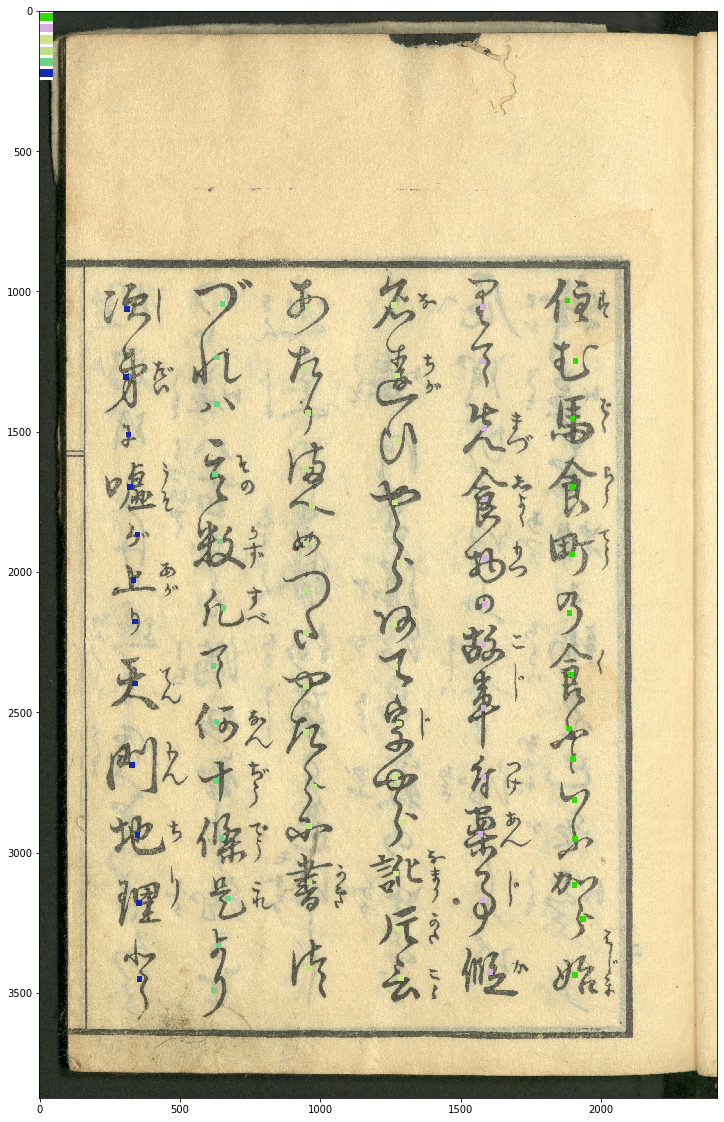

MEAN NEAREST NEIGHBOR DISTANCE 46.37882862348247
xlst shape (134, 2)
cl [ 0  1  2  3  4  2  5  6  7  8  7  9  7 10 11 12 12  8 13  5  9 11 14  8
  2 15 16 17 18 19 20 16 10 21  4 22 23 24 17 20 25  1  7  4  7  3 24 19
 26 27  3 28 29 15 28 30 13 31  9 32  2 25 20 33 18  2 28 33 34 35 24 15
  0 22  3 36  3 13 37 30 27 32 24  0 38 26 29  4 24 34 39 18 22 40 17 41
 22 42  6 14 43  6 40 38 44 22 36 33  4  2 45  6 11  6 16 42 12 43 46 12
 28 35 41 14 44 39 12 41 35  9 31 47 12  6]
clusters [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
new clusters [38, 35, 14, 9, 23, 3, 12, 7, 43, 0, 40, 41, 29, 16, 18, 26, 44, 32, 24, 25, 47, 42, 6, 27, 4, 37, 22, 11, 21, 45, 2, 30, 34, 13, 31, 46, 39, 36, 28, 17, 33, 15, 20, 5, 19, 8, 1, 10]


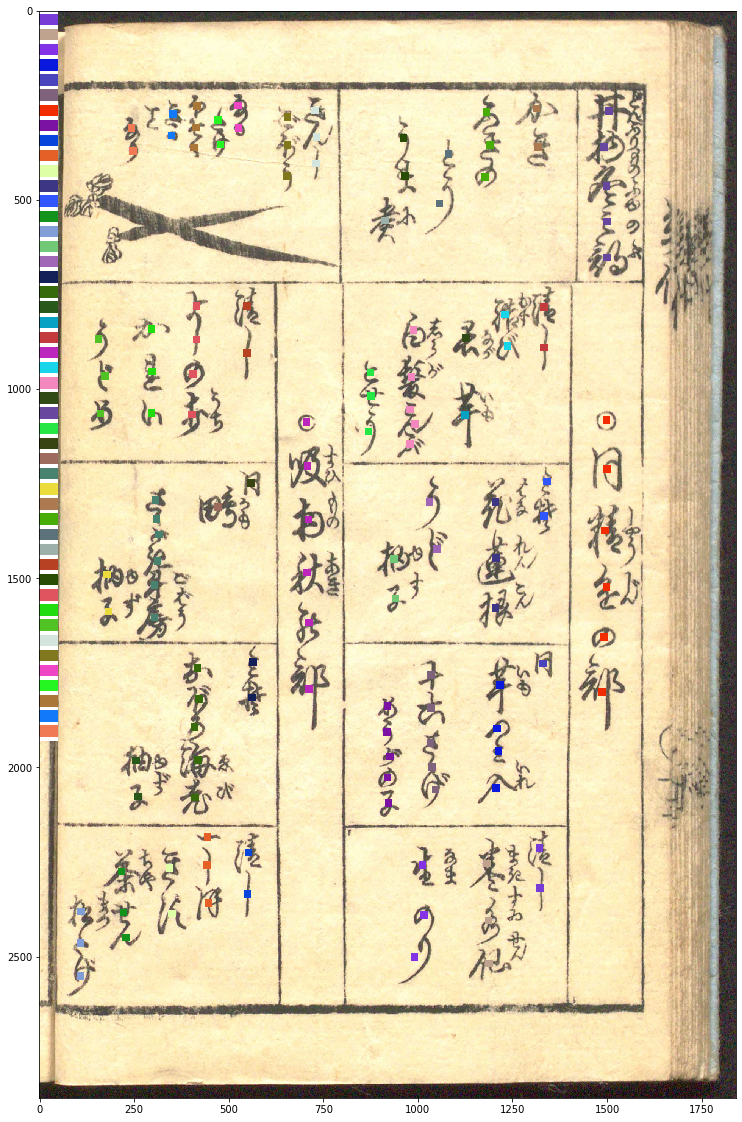

In [ ]:

#Cell for performing clustering.  
#Steps: do a DBSCAN clustering, then save the image with cluster centers overlaid.  

'''What about doing a hierarchical clustering and then reading by iterating over cluster centers.  '''

from sklearn.cluster import DBSCAN
import sklearn
import pandas as pd
import random

#print('running')

#print(sorted(sklearn.neighbors.VALID_METRICS['brute']) )


print(len(df_train.values))

print(df_train)


for img, labels in df_train.values:
    

    xlst = []
    
    if type(labels) == float:
        continue
    chars = []
    for unic, x, y, w, h in np.array(labels.split()).reshape(-1, 5):
        chars.append((unic, int(int(x)+int(w)/2), int(int(y)+int(h)/2)))
    #print(img)
    #print(chars)
    img = io.imread('./data/train/train/{}.jpg'.format(img))
    
    for unic, x, y in chars:
        img[y-10:y+10, x-10:x+10, :] = [255, 0, 0]
        xlst.append([x,y])
        
    xlst = np.array(xlst).astype('float32')
    
    from sklearn.neighbors import NearestNeighbors
    nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(xlst)
    
    distances, indices = nbrs.kneighbors(xlst)
    
    mean_dist = np.mean(distances)
    print("MEAN NEAREST NEIGHBOR DISTANCE", np.mean(distances))
    
    clustering = DBSCAN(eps= mean_dist * 4.0, min_samples=1)

    
    #xlst[:,0] *= 0.1
    
    xlst_cluster = xlst * 1.0
    
    xlst_cluster[:,0] *= 5.0
    
    print('xlst shape', xlst.shape)
    
    #print('xlst', xlst)
    
    cluster_labels = clustering.fit_predict(xlst_cluster)
        
        
    #pd.Series(cluster_labels).value_counts()
    
    print('cl', cluster_labels)
    
    cluster2chars = {}
    
    for j in range(0, len(cluster_labels)):
        #print('cluster', cluster_labels[j])
        #print('char', xlst[j])
        
        if not cluster_labels[j] in cluster2chars: 
            cluster2chars[cluster_labels[j]] = []

        cluster2chars[cluster_labels[j]].append(xlst[j])
            
    cluster2color = {}
            
    for keyc in cluster2chars: 
        #print(keyc)
        randcolor = [random.randint(0,255), random.randint(0,255), random.randint(0,255)]
        #print(cluster2chars[keyc])
        cluster2color[keyc] = randcolor
        for chararray in cluster2chars[keyc]:
            x = int(chararray[0])
            y = int(chararray[1])
            img[y-10:y+10, x-10:x+10, :] = randcolor
        
        
        
    clusters = list(cluster2chars.keys())
    
    print('clusters', clusters)
    #Reorder the clusters!
    
    new_clusters = []

    while True:
        rightmost = 0.0
        pick = -1
        for cluster in clusters:
            chars = np.array(cluster2chars[cluster])
            hor_center = chars[:,0].mean() + chars[:,1].mean()
            if hor_center > rightmost: 
                pick = cluster
                rightmost = hor_center
                
                
        clusters.remove(pick)
        new_clusters.append(pick)
    
        if len(clusters) == 0:
            break
            
    clusters = new_clusters
    
    print('new clusters', clusters)
    
    img[0 : 40*(len(clusters)) + 10, 0:50, :] = 255
    for j in range(len(clusters)):
        img[(j)*40 + 10 : (j)*40 + 40, 0 : 50, :] = cluster2color[clusters[j]]
            
    plt.figure(figsize=(20, 20))
    plt.imshow(img)
    plt.show()
    #print(sorted([x[1] for x in chars]))
    #break


In [19]:
density = np.zeros(img.shape[1])

In [20]:
width = img.shape[1] // 50
for x in [x[1] for x in chars]:
    density[x-width:x+width] += 1

In [21]:
columns = []
col = None
for ptr in range(len(density)):
    height = density[ptr]
    if col is None and height > 0:
        col = ptr
    if col and height == 0:
        columns.append((col, ptr, []))
        col = None

In [22]:
chars = sorted(chars, key=lambda x: x[2])
for char, x, y in chars:
    for i, (left, right, _) in enumerate(columns):
        if x < right:
            columns[i][2].append((char, x, y))
            break

In [23]:
from skimage import draw

char_order = []
lines = []
for _, _, chars in columns[::-1]:
    char_order.extend(chars)
    
for p1, p2 in zip(char_order[1:], char_order[:-1]):
    print(p1, p2)
    lines.append(draw.line(*p1[1:], *p2[1:]))

('U+7269', 1492, 362) ('U+4E3C', 1504, 267)
('U+51AC', 1498, 465) ('U+7269', 1492, 362)
('U+4E4B', 1500, 559) ('U+51AC', 1498, 465)
('U+90E8', 1500, 654) ('U+4E4B', 1500, 559)
('U+25CB', 1498, 1083) ('U+90E8', 1500, 654)
('U+540C', 1499, 1212) ('U+25CB', 1498, 1083)
('U+7CBE', 1494, 1375) ('U+540C', 1499, 1212)
('U+9032', 1498, 1524) ('U+7CBE', 1494, 1375)
('U+306E', 1491, 1656) ('U+9032', 1498, 1524)
('U+90E8', 1486, 1801) ('U+306E', 1491, 1656)
('U+304B', 1313, 260) ('U+90E8', 1486, 1801)
('U+304D', 1318, 362) ('U+304B', 1313, 260)
('U+6E05', 1333, 784) ('U+304D', 1318, 362)
('U+3057', 1333, 891) ('U+6E05', 1333, 784)
('U+30DF', 1341, 1245) ('U+3057', 1333, 891)
('U+305D', 1333, 1337) ('U+30DF', 1341, 1245)
('U+540C', 1331, 1726) ('U+305D', 1333, 1337)
('U+6E05', 1321, 2213) ('U+540C', 1331, 1726)
('U+3057', 1323, 2319) ('U+6E05', 1321, 2213)
('U+3075', 1181, 269) ('U+3057', 1323, 2319)
('U+3046', 962, 338) ('U+3075', 1181, 269)
('U+304D', 1190, 356) ('U+3046', 962, 338)
('U+3068', 1

In [24]:
for line in lines:
    img[line[1], line[0], :] = [255, 0, 0]
    img[line[1]+1, line[0]+1, :] = [255, 0, 0]
    #img[line[1]+2, line[0]+2, :] = [255, 0, 0]

    img[line[1]-1, line[0]-1, :] = [255, 0, 0]
    img[line[1]-2, line[0]-2, :] = [255, 0, 0]


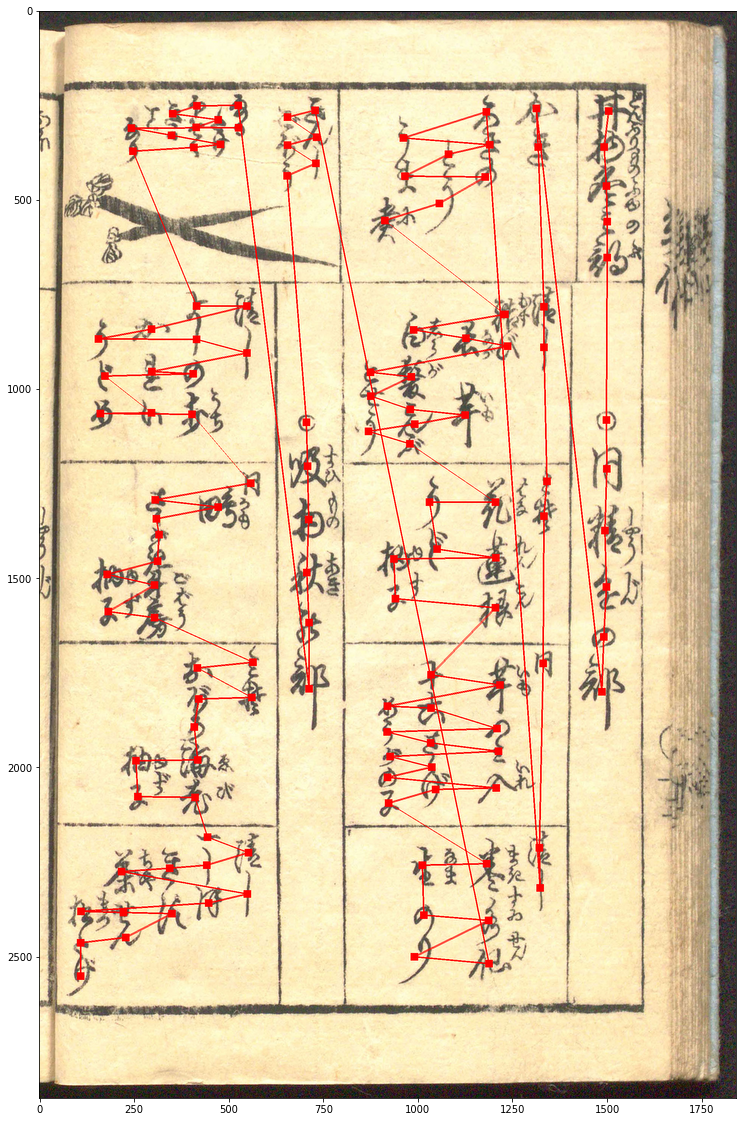

In [25]:
plt.figure(figsize=(20, 20))
plt.imshow(img, interpolation='lanczos')
plt.show()

In [13]:
def transcribe(img, chars, draw=False):
    if draw:
        img = img.copy()
        
        for unic, x, y in chars:
            img[y-10:y+10, x-10:x+10, :] = [255, 0, 0]
        
    density = np.zeros(img.shape[1])
    
    width = img.shape[1] // 50
    for x in [x[1] for x in chars]:
        density[x-width:x+width] += 1
        
    columns = []
    col = None
    for ptr in range(len(density)):
        height = density[ptr]
        if col is None and height > 0:
            col = ptr
        if col and height == 0:
            columns.append((col, ptr, []))
            col = None
            
    chars = sorted(chars, key=lambda x: x[2])
    for char, x, y in chars:
        for i, (left, right, _) in enumerate(columns):
            if x < right:
                columns[i][2].append((char, x, y))
                break
                
#     print(columns)
    output = ''
    for _, _, chars in columns[::-1]:
        for unicode, _, _ in chars:
            char = chr(int(unicode[2:], 16))
            output += char
#         output += '\n'
        
    if draw:
        char_order = []
        lines = []
        for _, _, chars in columns[::-1]:
            char_order.extend(chars)

        import skimage.draw as skdraw
        for p1, p2 in zip(char_order[1:], char_order[:-1]):
            lines.append(skdraw.line(*p1[1:], *p2[1:]))
            lines.append(skdraw.line(p1[1]+1, p1[2]+1, p2[1]+1, p2[2]+1))
            lines.append(skdraw.line(p1[1]-1, p1[2]-1, p2[1]-1, p2[2]-1))
        for line in lines:
            img[line[1], line[0], :] = [255, 0, 0]
            
        return output.strip(), img

    return output.strip()

In [13]:
import editdistance

In [14]:
swapdata = pd.read_csv('./itaijiswapdata.csv')
swaps = {}
for a, b in swapdata.values[:, 2:]:
    swaps[a] = b

In [15]:
ds = []
for fn, labels in df_train.values:
    if fn not in gt:
        continue
    if type(labels) == float:
        continue
    chars = []
    for unic, x, y, w, h in np.array(labels.split()).reshape(-1, 5):
        chars.append((unic, int(int(x)+int(w)/2), int(int(y)+int(h)/2)))
        
    actual = gt[fn]
    for a,b in swaps.items():
        actual = actual.replace(a, b)

    print(fn)
    img = io.imread('./input/train_images/{}.jpg'.format(fn))
    
    output, img = transcribe(img, chars, draw=True)
    
#     plt.figure(figsize=(18, 18))
#     plt.imshow(img, interpolation='lanczos')
#     plt.show()
    
    print(output)
    print(gt[fn])
    if sorted(output.strip()) == sorted(actual.strip()):
        distance = editdistance.eval(output.strip(), actual.strip()) / len(actual)
        print(distance)
        ds.append(distance)
    else:
        print('discrepancy')

NameError: name 'gt' is not defined

In [ ]:
(np.array(ds) == 0).mean()

In [ ]:
import glob
textfiles = glob.glob('./text/*.txt')
textfiles

In [ ]:
gt = {}
for f in textfiles:
    print(f)
    try:
        text = open(f,'rb').read().decode('utf-8').split('\n')
    except UnicodeDecodeError:
        print('skipping')
        continue
        
    working = ''
    img = None
    for line in text:
        if line.startswith('<Image'):
            if img is not None:
                gt[img] = working
                working = ''
            img = line.strip()[7:-5]
            print(img)
        elif len(line) > 0:
            working += line

In [ ]:
len(gt)